# Data science project figures

Due: 11/18/22 11:59pm

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_raw = pd.read_csv('community_health_survey_2020.csv')
data_raw

,cid,strata,survey,wt21_dual,wt21_dual_q1,strata_q1,qxvers,mood1,mood2,mood3,...,daysalc30,averagedrink20,heavydrink20,bingenew,ipvphy,insultipv,wt_compare,insure20r,hhsize,child
0,2100001,20201407,21,2192.519227,NaN,NaN,2,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,2192.519227,4.0,2,2.0
1,2100002,20201304,21,15.883518,57.560901,20201304.0,1,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,15.883518,3.0,1,2.0
2,2100003,20201502,21,349.179157,577.652346,20201500.0,1,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,349.179157,1.0,3,1.0
3,2100004,20201314,21,110.608484,NaN,NaN,2,5,3,2,...,0.0,0.000000,2.0,2.0,2.0,NaN,110.608484,6.0,4,1.0
4,2100005,20201210,21,230.592102,NaN,NaN,2,5,5,5,...,2.0,0.066667,2.0,2.0,2.0,2.0,230.592102,1.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,2116976,20204000,21,163.200475,391.856227,20204000.0,1,2,3,5,...,6.0,0.600000,2.0,2.0,2.0,2.0,163.200475,4.0,5,2.0
8777,2116977,20204000,21,161.775391,NaN,NaN,2,3,2,2,...,0.0,0.000000,2.0,2.0,2.0,1.0,161.775391,2.0,1,2.0
8778,2116978,20204000,21,139.030975,405.363790,20204000.0,1,4,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,139.030975,4.0,1,2.0
8779,2116979,20204000,21,115.114648,NaN,NaN,2,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,115.114648,1.0,5,1.0


In [29]:
list(data_raw.columns)

['cid',
 'strata',
 'survey',
 'wt21_dual',
 'wt21_dual_q1',
 'strata_q1',
 'qxvers',
 'mood1',
 'mood2',
 'mood3',
 'mood4',
 'mood5',
 'mood6',
 'mood9',
 'mood8',
 'mood11',
 'nutrition1',
 'newrace',
 'newrace6',
 'agegroup',
 'agegroup5',
 'agegroup6',
 'age21up',
 'age25up',
 'age40new',
 'age45up',
 'age50up',
 'age18_64',
 'birthsex',
 'imputed_neighpovgroup4_1519',
 'imputed_povertygroup',
 'imputed_povgroup3',
 'imputed_pov200',
 'generalhealth',
 'insuredgateway20',
 'insured',
 'insure5',
 'pcp20',
 'medplace',
 'didntgetcare20',
 'regularrx',
 'skiprxcost',
 'toldhighbp20',
 'toldprescription20',
 'takingmeds20',
 'checkedbp20_q1',
 'diabetes20',
 'ageatdiabetes',
 'diabcntrlmeds',
 'toohighblsugar',
 'everasthma',
 'currentasthma20',
 'stillasthmaall',
 'firsttoldasthma',
 'k6',
 'nspd',
 'mhtreat20_all',
 'delaypayrent',
 'workingac_q1',
 'rodentsstreet',
 'helpneighbors20_q1',
 'discussissues',
 'helpcommproj',
 'didntcleandog',
 'trustkeys',
 'proudneigh',
 'smoker',
 

## Only keep rows where age is 65+

In [3]:
data_65 = data_raw[data_raw.agegroup==4]
data_65

,cid,strata,survey,wt21_dual,wt21_dual_q1,strata_q1,qxvers,mood1,mood2,mood3,...,daysalc30,averagedrink20,heavydrink20,bingenew,ipvphy,insultipv,wt_compare,insure20r,hhsize,child
0,2100001,20201407,21,2192.519227,NaN,NaN,2,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,2192.519227,4.0,2,2.0
1,2100002,20201304,21,15.883518,57.560901,20201304.0,1,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,15.883518,3.0,1,2.0
5,2100006,20201210,21,78.818564,170.942622,20201210.0,1,5,3,5,...,1.0,0.033333,2.0,2.0,2.0,2.0,78.818564,3.0,2,2.0
6,2100007,20201407,21,5638.580060,9706.463721,20201400.0,1,3,5,3,...,0.0,0.000000,2.0,2.0,2.0,2.0,5638.580060,3.0,5,2.0
7,2100008,20201107,21,231.304080,481.508436,20201107.0,1,5,4,4,...,15.0,0.500000,2.0,2.0,1.0,2.0,231.304080,3.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,2116875,20204000,21,79.876826,139.147942,20204000.0,1,3,5,3,...,0.0,0.000000,2.0,2.0,2.0,2.0,79.876826,3.0,2,2.0
8682,2116882,20204000,21,54.151532,NaN,NaN,2,3,3,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,54.151532,1.0,2,2.0
8695,2116895,20204000,21,89.989038,201.231894,20204000.0,1,5,5,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,89.989038,3.0,2,2.0
8720,2116920,20204000,21,39.508712,NaN,NaN,2,1,4,5,...,0.0,0.000000,2.0,2.0,2.0,2.0,39.508712,1.0,4,2.0


## Count race, sex

In [4]:
from collections import Counter

In [5]:
Counter(data_65.birthsex)

Counter({2.0: 1134,
         1.0: 775,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

- 775 male
- 1134 female
- 12 empty value

In [22]:
races = np.unique(data_65.newrace6)
Counter(data_65.newrace6)

Counter({3: 376, 2: 405, 1: 868, 5: 10, 6: 63, 4: 199})

In [7]:
sexes = [1, 2]

In [8]:
for race in races:
    for sex in sexes:
        print(race, sex)
        print(len(data_65[data_65.newrace6==race][data_65.birthsex==sex]))

1 1
392
1 2
473
2 1
137
2 2
266
3 1
137
3 2
236
4 1
80
4 2
115
5 1
6
5 2
4
6 1
23
6 2
40


In [23]:
data_spec = data_65[['mood5', 'nutrition1']]

## Investigate distribution of nutrition

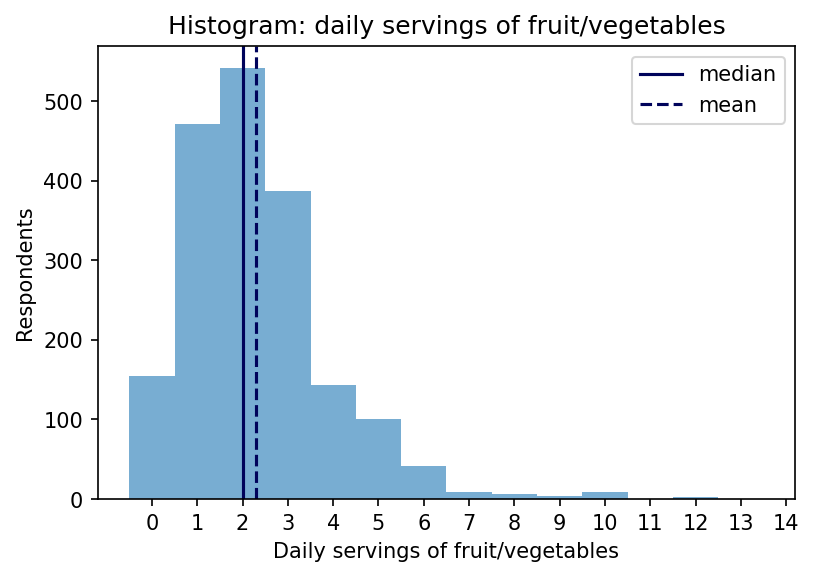

In [54]:
plt.figure(dpi=150)
plt.hist(data_spec.nutrition1, alpha=0.6, bins=np.arange(0,15,1)-0.5)
plt.title('Histogram: daily servings of fruit/vegetables')
plt.xlabel('Daily servings of fruit/vegetables')
plt.ylabel('Respondents')
plt.axvline(np.median(data_spec[data_spec.nutrition1.notnull()].nutrition1),
            color='xkcd:dark blue', label='median')
plt.axvline(np.mean(data_spec.nutrition1),
            color='xkcd:dark blue', label='mean', ls='--')
plt.xticks(np.arange(0, 15))
plt.legend()
plt.show()

## Investigate nutrition vs. mood

In [55]:
data_spec

,mood5,nutrition1
0,5,1.0
1,4,1.0
5,3,3.0
6,5,1.0
7,5,2.0
...,...,...
8675,5,2.0
8682,3,2.0
8695,5,1.0
8720,4,1.0


In [56]:
np.unique(data_spec.nutrition1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 14.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

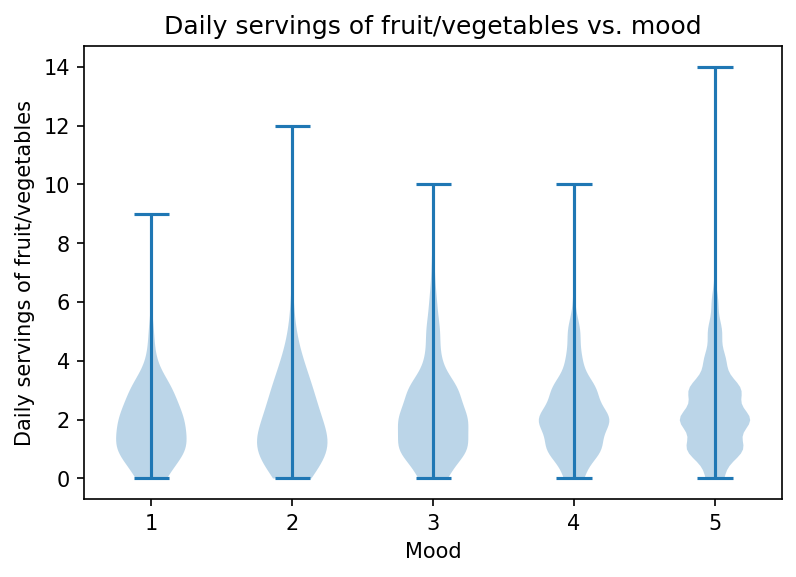

In [57]:
data_to_plot = []
for i in range(1,6):
    data_mood = data_spec[data_spec.mood5==i]
    data_mood_to_plot = data_mood[data_mood.nutrition1.notnull()]
    data_to_plot.append(data_mood_to_plot.nutrition1)

plt.figure(dpi=150)
plt.violinplot(data_to_plot)
plt.title('Daily servings of fruit/vegetables vs. mood')
plt.xlabel('Mood')
plt.ylabel('Daily servings of fruit/vegetables')
plt.show()

Info about violin plots from https://www.tutorialspoint.com/matplotlib/matplotlib_violin_plot.htm#:~:text=Violin%20plots%20are%20similar%20to,in%20the%20standard%20box%20plots

"Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots. Overlaid on this box plot is a kernel density estimation. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories"."